# Strategy to group Engineering Colleges

You are an independent trainer who would like to pitch your Data Science training program to a set of Engineering colleges. You have data of 26 colleges after survey using questionnaires. Each college has been given a score for 5 performance criteria-Teaching, Fees, Placement, Internship & Infrastructure. Ratings are in the standardized scale of 1 to 5 where 5 has a higher weightage than 1. Segment the colleges into groups and come up with your pitch recommendations for each segment.

# Import Libraries and load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Engg_College_Data.csv') 

# Checking the data

In [3]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,1,A,5,2,5,5,3
1,2,B,4,2,5,5,3
2,3,C,4,5,5,4,5
3,4,D,5,4,5,4,4
4,5,E,2,5,2,2,5


In [4]:
df.shape

(26, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SR_NO           26 non-null     int64 
 1   Engg_College    26 non-null     object
 2   Teaching        26 non-null     int64 
 3   Fees            26 non-null     int64 
 4   Placements      26 non-null     int64 
 5   Internship      26 non-null     int64 
 6   Infrastructure  26 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.5+ KB


# Get the count of unique values for Engg_College

In [6]:
df['Engg_College'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

# Get the unique values for Engg_College

In [7]:
df['Engg_College'].nunique()

26

# Checking the Summary Statistic

In [8]:
df.describe()

,SR_NO,Teaching,Fees,Placements,Internship,Infrastructure
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,13.500000,2.807692,3.576923,2.884615,2.769231,3.384615
std,7.648529,1.132051,1.331858,1.531716,1.242826,1.298520
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.250000,2.000000,2.250000,1.250000,2.000000,3.000000
50%,13.500000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,19.750000,3.000000,5.000000,4.000000,4.000000,4.750000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000


<AxesSubplot:xlabel='Engg_College', ylabel='Placements'>

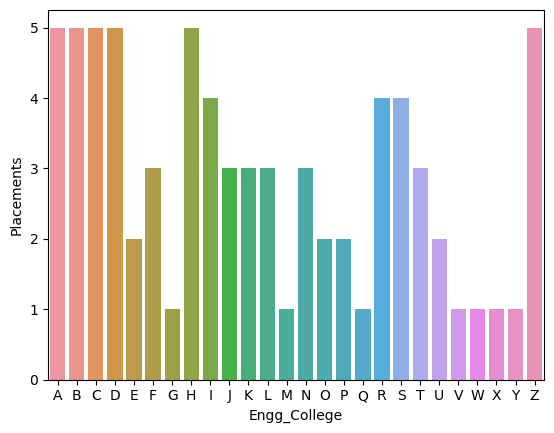

In [9]:
sns.barplot(x='Engg_College',y='Placements',data=df)

<AxesSubplot:xlabel='Engg_College', ylabel='Fees'>

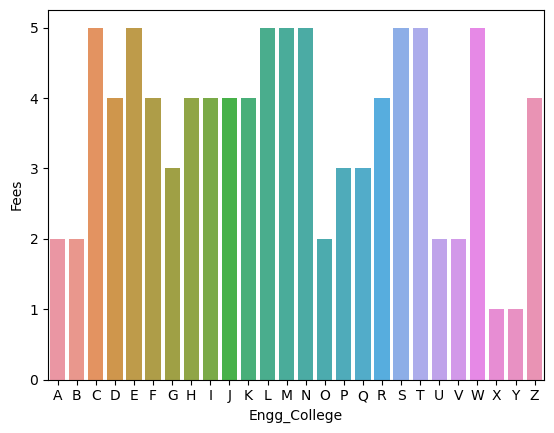

In [10]:
sns.barplot(x='Engg_College',y='Fees',data=df)

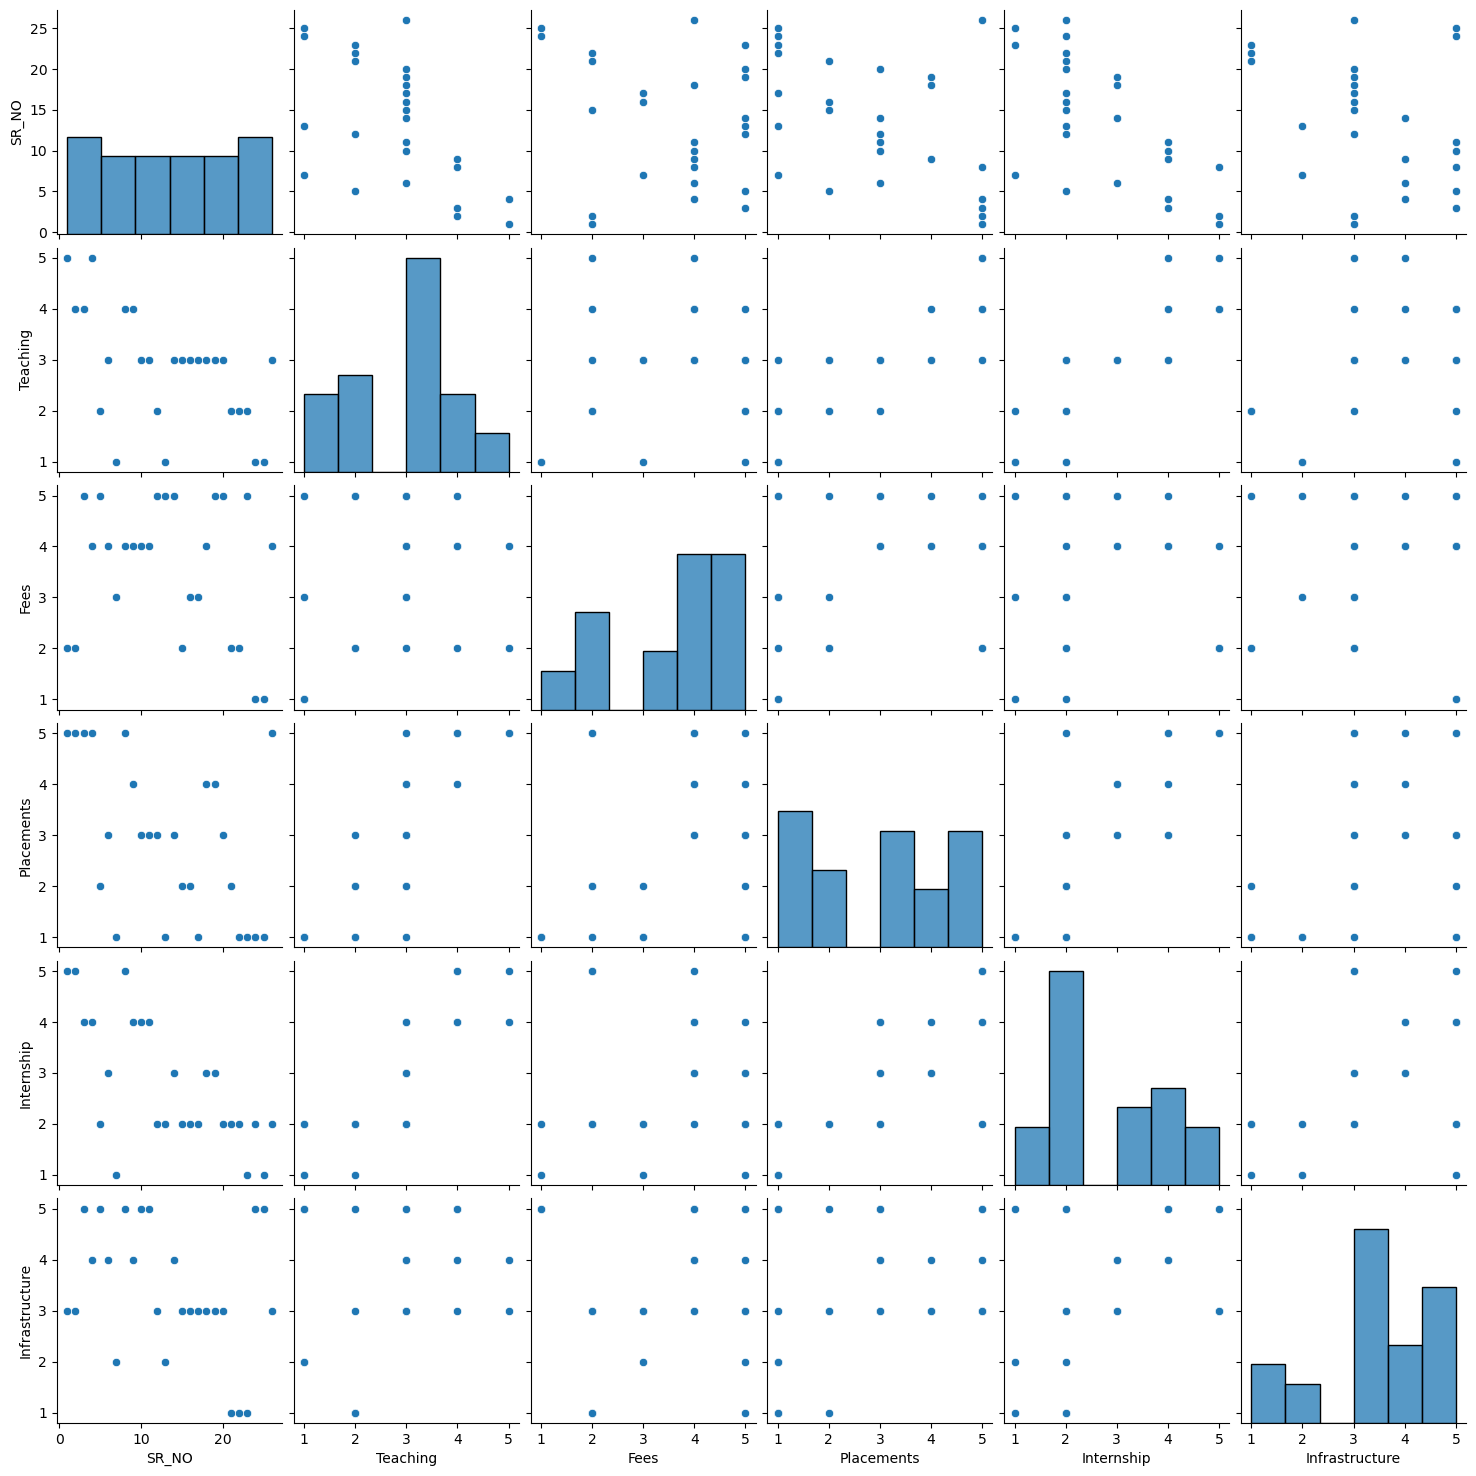

In [11]:
sns.pairplot(df)

<AxesSubplot:xlabel='Engg_College', ylabel='Fees'>

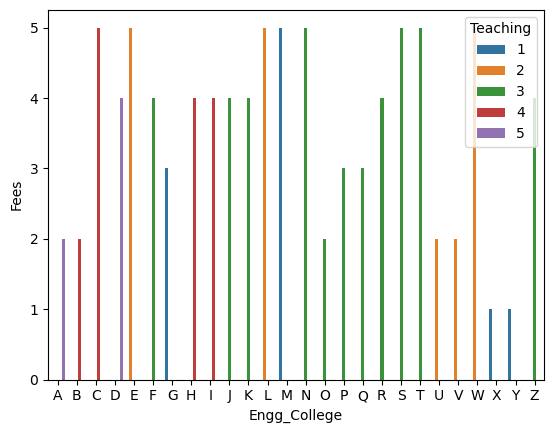

In [12]:
sns.barplot(x='Engg_College',y='Fees',data=df,hue='Teaching')

<AxesSubplot:xlabel='Engg_College', ylabel='Fees'>

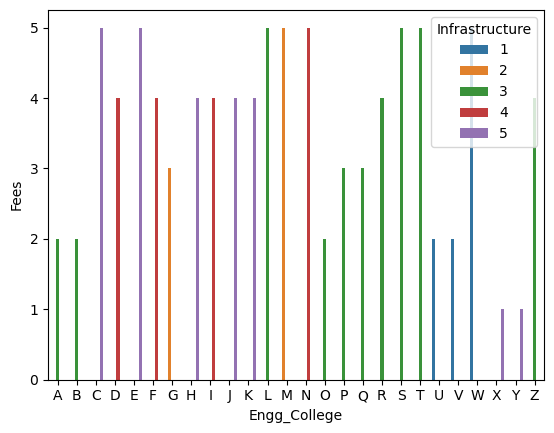

In [13]:
sns.barplot(x='Engg_College',y='Fees',data=df,hue='Infrastructure')

# Removing the SR_NO column and storing the result in new object enggdata

In [14]:
enggdata=df.drop('SR_NO',axis=1)

In [15]:
enggdata.head()

,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure
0,A,5,2,5,5,3
1,B,4,2,5,5,3
2,C,4,5,5,4,5
3,D,5,4,5,4,4
4,E,2,5,2,2,5


# Creating the Dendrogram
### Importing dendrogram and linkage module

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [17]:
enggdata.iloc[:,1:6].head(1)

,Teaching,Fees,Placements,Internship,Infrastructure
0,5,2,5,5,3


### Choosing average linkage method

In [18]:
link_method=linkage(enggdata.iloc[:,1:6],method='average')

In [19]:
label_list=np.array(enggdata['Engg_College'])

In [20]:
label_list

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

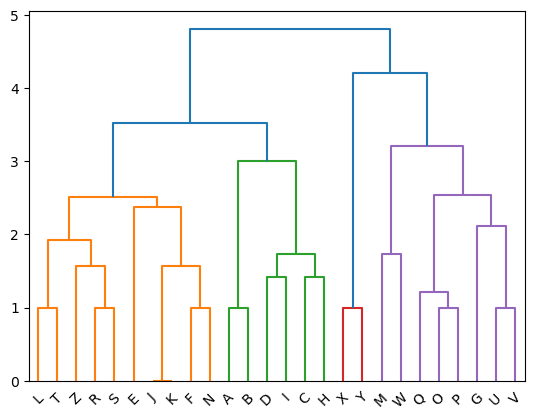

In [21]:
dend=dendrogram(link_method,labels=label_list)

### Cutting the Dendrogram with suitable clusters

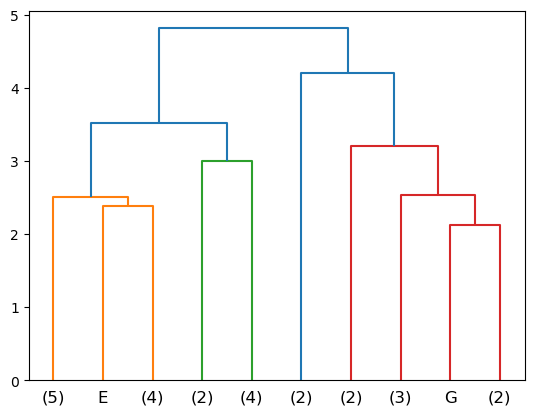

In [22]:
dend=dendrogram(link_method,labels=label_list,truncate_mode='lastp',p=10)

# Importing fcluster module to create clusters

In [23]:
from scipy.cluster.hierarchy import fcluster

In [24]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
cluster=fcluster(link_method,3,criterion='maxclust')
cluster

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

In [25]:
cluster=fcluster(link_method,4,criterion='distance')
cluster

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3,
       3, 2, 2, 1], dtype=int32)

Appending clusters to original dataset

In [26]:
df['cluster']=cluster

In [27]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster
0,1,A,5,2,5,5,3,1
1,2,B,4,2,5,5,3,1
2,3,C,4,5,5,4,5,1
3,4,D,5,4,5,4,4,1
4,5,E,2,5,2,2,5,1


### Cluster Frequency

In [28]:
df['cluster'].value_counts().sort_index()

1    16
2     2
3     8
Name: cluster, dtype: int64

# Cluster Profiles

In [29]:
df.iloc[:,1:8].groupby('cluster').mean()

,Teaching,Fees,Placements,Internship,Infrastructure
cluster,,,,,
1,3.375,4.125,3.875,3.4375,3.875
2,1.000,1.000,1.000,1.5000,5.000
3,2.125,3.125,1.375,1.7500,2.000


In [30]:
clust_pro=df.iloc[:,1:8].groupby('cluster').mean()
clust_pro['Freq']=df['cluster'].value_counts().sort_index()

In [31]:
clust_pro

,Teaching,Fees,Placements,Internship,Infrastructure,Freq
cluster,,,,,,
1,3.375,4.125,3.875,3.4375,3.875,16
2,1.000,1.000,1.000,1.5000,5.000,2
3,2.125,3.125,1.375,1.7500,2.000,8


# Using Agglomerative Clustering

In [32]:
from sklearn.cluster import AgglomerativeClustering

In [33]:
cluster=AgglomerativeClustering(n_clusters=3,linkage='average')
cluster

AgglomerativeClustering(linkage='average', n_clusters=3)

In [34]:
clust_agglo=cluster.fit_predict(enggdata.iloc[:,1:6])
clust_agglo

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 2, 2, 0], dtype=int64)

In [35]:
df['Agglo_clust']=clust_agglo

Appending clusters to original dataset

In [36]:
df.head()

,SR_NO,Engg_College,Teaching,Fees,Placements,Internship,Infrastructure,cluster,Agglo_clust
0,1,A,5,2,5,5,3,1,0
1,2,B,4,2,5,5,3,1,0
2,3,C,4,5,5,4,5,1,0
3,4,D,5,4,5,4,4,1,0
4,5,E,2,5,2,2,5,1,0


##### Agglomerative Cluster Frequency

In [38]:
df['Agglo_clust'].value_counts().sort_index()

0    16
1     8
2     2
Name: Agglo_clust, dtype: int64

# Agglomeraive Cluster Profiles

In [39]:
clust_agglo=df.iloc[:,1:9].groupby('Agglo_clust').mean()
clust_agglo['Freq']=df['Agglo_clust'].value_counts().sort_index()

In [40]:
clust_agglo

,Teaching,Fees,Placements,Internship,Infrastructure,cluster,Freq
Agglo_clust,,,,,,,
0,3.375,4.125,3.875,3.4375,3.875,1.0,16
1,2.125,3.125,1.375,1.7500,2.000,3.0,8
2,1.000,1.000,1.000,1.5000,5.000,2.0,2


# Recommendations


In [42]:
from sklearn.metrics import silhouette_score
X = np.random.rand(26,7)
model = AgglomerativeClustering(n_clusters=3)
model.fit(X)
score = silhouette_score(X, model.labels_)
print(score)

0.15172764668149027


# Saving the Cluster Profiles in a csv file

In [ ]:
#df.to_csv('enggdata_hc.csv')